In [88]:
import math
phi1 = math.radians(5)
phi2 = math.radians(3.5)

vypis = (0, 1, 2, 3, 4, 717, 718, 719, 720)

vektor = [phi1+phi2, 0, phi1-phi2, 0]

vysledky = []

# delim dvojkou uz tady, at je prehlednejsi maticovy zapis
sinphi1 = math.sin(phi1)/2
sinphi2 = math.sin(phi2)/2
cosphi1 = math.cos(phi1)/2
cosphi2 = math.cos(phi2)/2

matice = [[cosphi1+cosphi2, sinphi2-sinphi1, cosphi2-cosphi1, sinphi1+sinphi2],
          [sinphi1-sinphi2, cosphi1+cosphi2, -sinphi1-sinphi2, cosphi2-cosphi1],
          [cosphi2-cosphi1, sinphi1+sinphi2, cosphi1+cosphi2, sinphi2-sinphi1],
          [-sinphi1-sinphi2, cosphi2-cosphi1, sinphi1-sinphi2, cosphi1+cosphi2]
          ]


In [89]:
def vector_mult(x, y):
    '''dot product of two vectors'''
    result = 0
    assert len(x) == len(y)
    for i in range(len(x)):
        result += (x[i]*y[i])
    return result

In [90]:
vector_mult([1,7,2],[2,3,0])

23

In [91]:
def left_asoc_mult(matrix, pocet:int):
    '''vraci matici umocnenou na pocet,`((A)*A)*A...` '''
    if pocet == 1:
        return matrix
    assert pocet > 1
    size = len(matrix)
    right_matrix = left_asoc_mult(matrix, pocet-1)
    result = []
    for row in range(size):
        row_res = []
        for j in range(size):
            col = []
            assert size == len(matrix[row])
            for i in range(size):
                col.append(matrix[i][j])
            row_res.append(vector_mult(right_matrix[row], col))
        result.append(row_res)
    return result

In [92]:
left_asoc_mult([[2,7],[5,4]], 3)

[[288, 441], [315, 414]]

In [93]:
def matrix_vector_mul(matrix, vector):
    '''vector needto be in row format, if you need to multiply matrix with vector in column format, dont use this function'''
    result = []
    for i in range(len(vector)):
        row = 0
        for j in range(len(matrix[i])):
            row += matrix[i][j]*vector[j]
        result.append(row)
    return result

In [94]:
matrix_vector_mul([[1, 1],[1, 1]], [6, 0])

[6, 6]

In [95]:
def right_asoc_mult(matrix, vector, pocet:int):
    if pocet == 0:
        return vector
    vector2 = matrix_vector_mul(matrix, vector)
    return right_asoc_mult(matrix, vector2, pocet-1)

In [96]:
right_asoc_mult([[2,7],[5,4]],[1,1], 3)

[729, 729]

In [97]:
# main
for i in range(len(vypis)):
    if vypis[i] == 0:
        print(f"{vypis[i]}:\t{vektor}\t {right_asoc_mult(matice, vektor, vypis[i])}")
    else:
        print(f"{vypis[i]}:\t{matrix_vector_mul(left_asoc_mult(matice, vypis[i]), vektor)}\t {right_asoc_mult(matice, vektor, vypis[i])}")

0:	[0.148352986419518, 0, 0.026179938779914938, 0]	 [0.148352986419518, 0, 0.026179938779914938, 0]
1:	[0.1479577642100988, -3.448736698584377e-06, 0.026249621901815977, -0.010651531447473214]	 [0.1479577642100988, -3.448736698584377e-06, 0.026249621901815977, -0.010651531447473214]
2:	[0.1467744738830054, -2.7542957001237562e-05, 0.02645750935839446, -0.021242670039633375]	 [0.1467744738830054, -2.7542957001236803e-05, 0.02645750935839446, -0.02124267003963337]
3:	[0.14481022861268614, -9.269390602674194e-05, 0.02680012662114885, -0.03171340543337359]	 [0.14481022861268616, -9.269390602674103e-05, 0.026800126621148855, -0.03171340543337358]
4:	[0.14207683137065907, -0.00021884642228551816, 0.02727172004479883, -0.042004489686516315]	 [0.1420768313706591, -0.0002188464222855163, 0.027271720044798834, -0.04200448968651631]
717:	[0.14481022861268297, 9.269390602518416e-05, 0.02680012662114516, 0.03171340543337367]	 [0.14481022861268333, 9.269390602534634e-05, 0.026800126621145122, 0.0317

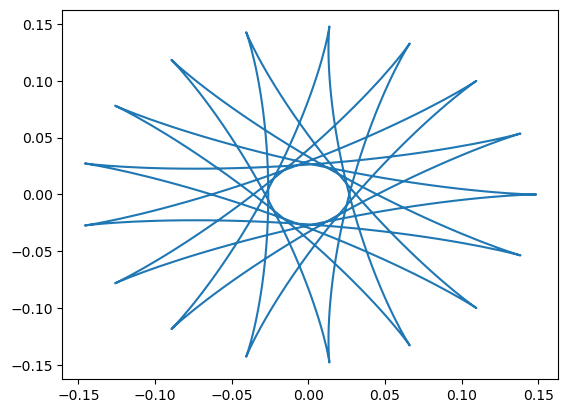

In [98]:
import matplotlib.pyplot as plt

x = [vektor[0]]
y = [vektor[1]]
for i in range(1, 720):
    sol = matrix_vector_mul(left_asoc_mult(matice, i), vektor)
    x.append(sol[0])
    y.append(sol[1])

plt.plot(x, y)